In [100]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
from ppap import utils, layers
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import backend as K

### Input data

In [154]:
n = 200
r, c = 100, 100
p_spans = [10, 5, 5] # batch, r, c
g_span = 5

X, Y, R = utils.perlin_batch(n, r, c, p_spans, g_span)

In [155]:
n_pix = n * r * c
IN = np.vstack([X.reshape(n_pix), Y.reshape(n_pix), R.reshape(n_pix)]).T

### Model

In [156]:
model = Sequential()
model.add(Dense(5, input_dim=3)) # Takes x, y, r
model.add(Activation(K.sin))
model.add(Dense(5))
model.add(Activation(K.sin))
model.add(Dense(5))
model.add(Activation("relu"))
model.add(Dense(5))
model.add(Activation("tanh"))
model.add(Dense(3))
model.add(Activation("sigmoid")) # Give RGB

In [157]:
OUT = model.predict(IN)
R, G, B = OUT[:, 0].reshape((n, r, c)), OUT[:, 1].reshape((n, r, c)), OUT[:, 2].reshape((n, r, c))

In [158]:
images = np.array([R, G, B]).swapaxes(0, 1)

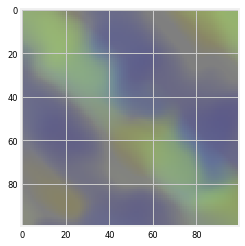

In [159]:
fig = plt.figure()
ax = plt.axes()

im = plt.imshow(images[0].T)

def init():
    im.set_data(images[0].T)
    return [im]

def animate(i):
    im.set_array(images[i].T)
    return [im]

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=n, interval=20, blit=True)

anim.save('basic_animation.mp4', fps=20, extra_args=['-vcodec', 'libx264']);